In [21]:
import pandas as pd
import math 
import matplotlib.pyplot as plt

data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
data = pd.DataFrame(data)


In [18]:
data

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [24]:
year_to_deaths = dict()
for ind in data.index:
    year = int(data["Date"][ind].split("/")[2])
    if not math.isnan(data["Fatalities"][ind]):
        if year_to_deaths.get(year):
            year_to_deaths[year] += data["Fatalities"][ind]
        else:
            year_to_deaths[year] = data["Fatalities"][ind]

x = list(year_to_deaths.keys())
y = list(year_to_deaths.values())

In [30]:
def draw(x1, y1, lableX, labelY, tableName):
        fig = plt.figure(figsize = (10, 5))
        
        plt.bar(x1, y1, color ='maroon', 
                width = 0.4)
        
        plt.xlabel(lableX)
        plt.ylabel(labelY)
        plt.title(tableName)
        plt.show()

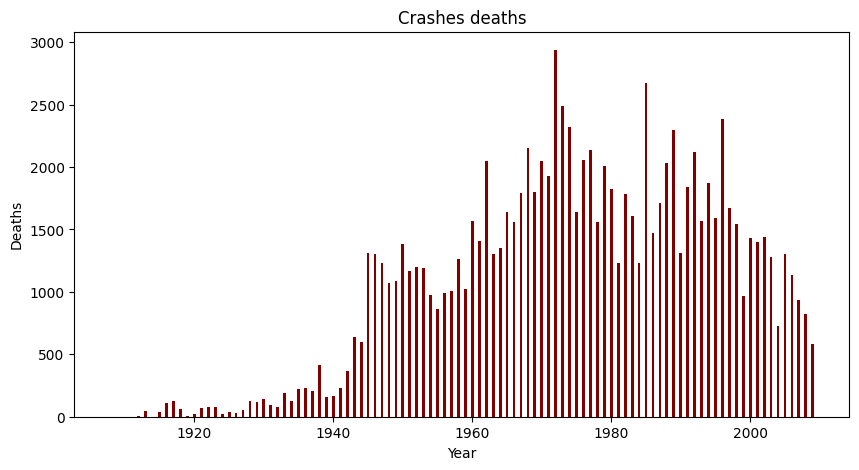

In [31]:
draw(x, y, "Year", "Deaths", "Crashes deaths")

In [58]:
year_to_deaths_civil = dict()
for ind in data.index:
    year = int(data["Date"][ind].split("/")[2])
    if not math.isnan(data["Fatalities"][ind]) and str(data["Operator"][ind]).find("Military") == -1:
        if year_to_deaths_civil.get(year):
            year_to_deaths_civil[year] += data["Fatalities"][ind]
        else:
            year_to_deaths_civil[year] = data["Fatalities"][ind]

x = list(year_to_deaths_civil.keys())
y = list(year_to_deaths_civil.values())


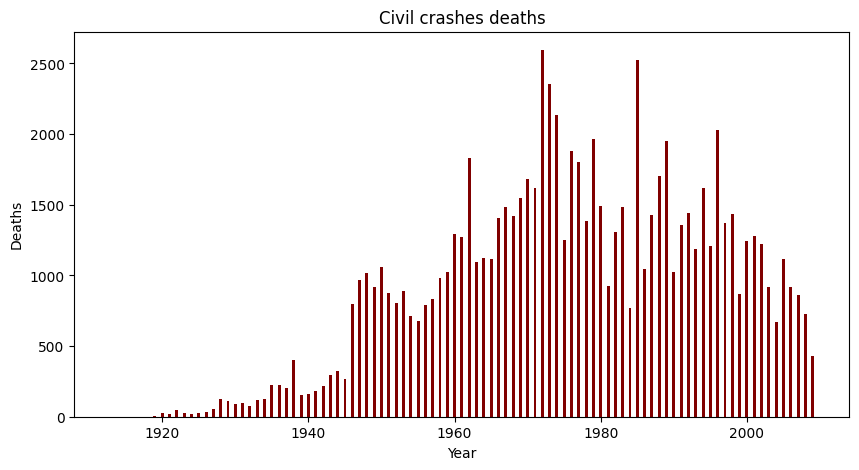

In [59]:
draw(x, y, "Year", "Deaths", "Civil crashes deaths")

In [67]:
year_to_crashes_civil = dict()
for ind in data.index:
    year = int(data["Date"][ind].split("/")[2])
    if not math.isnan(data["Fatalities"][ind]) and str(data["Operator"][ind]).find("Military") == -1:
        if year_to_crashes_civil.get(year):
            year_to_crashes_civil[year] += 1
        else:
            year_to_crashes_civil[year] = 1

x = list(year_to_crashes_civil.keys())
y = list(year_to_crashes_civil.values())


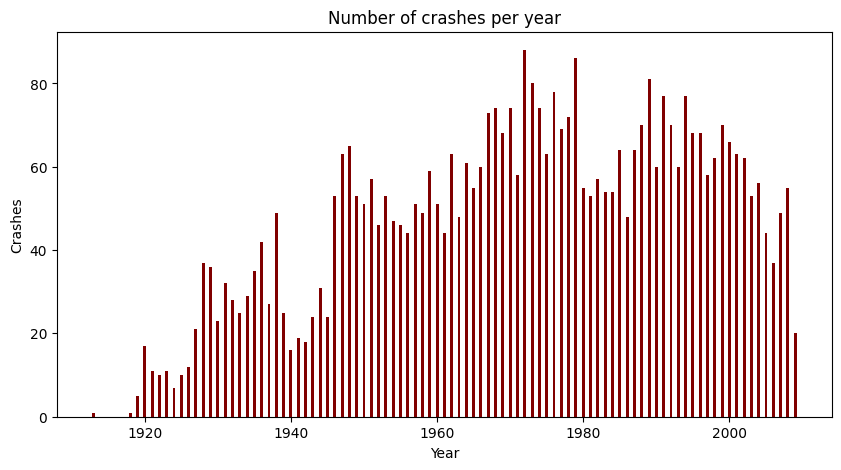

In [68]:
draw(x, y, "Year", "Crashes", "Number of crashes per year")

In [81]:
df2 = pd.DataFrame()

for ind in data.index:
    year = int(data["Date"][ind].split("/")[2])
    if not math.isnan(data["Fatalities"][ind]) and str(data["Operator"][ind]).find("Military") == -1 and str(data["Summary"][ind]).find("hijack") != -1 or str(data["Summary"][ind]).find("terror") != -1:
        df2 = df2._append(data.iloc[[ind]], ignore_index=True)

In [82]:
list(df2["Date"])


['07/29/1938',
 '07/16/1948',
 '12/30/1952',
 '04/11/1955',
 '01/23/1971',
 '12/06/1971',
 '07/05/1972',
 '05/18/1973',
 '02/22/1974',
 '05/23/1976',
 '06/27/1976',
 '08/28/1976',
 '12/04/1977',
 '08/11/1982',
 '06/14/1985',
 '09/05/1986',
 '12/25/1986',
 '07/24/1987',
 '12/21/1988',
 '10/02/1990',
 '05/19/1993',
 '12/10/1994',
 '12/26/1994',
 '07/17/1996',
 '11/23/1996',
 '07/23/1999',
 '12/24/1999',
 '05/25/2000',
 '03/15/2001',
 '09/11/2001',
 '09/11/2001',
 '09/11/2001',
 '09/11/2001',
 '02/22/2002',
 '08/14/2005']

In [38]:
year_to_deaths_military = dict()
for ind in data.index:
    year = int(data["Date"][ind].split("/")[2])
    if not math.isnan(data["Fatalities"][ind]) and str(data["Operator"][ind]).find("Military") != -1:
        if year_to_deaths_military.get(year):
            year_to_deaths_military[year] += data["Fatalities"][ind]
        else:
            year_to_deaths_military[year] = data["Fatalities"][ind]

x = list(year_to_deaths_military.keys())
y = list(year_to_deaths_military.values())


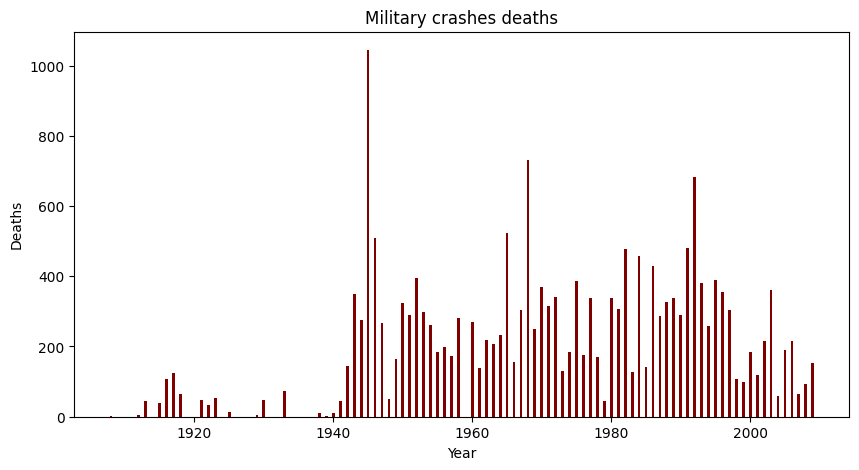

In [40]:
draw(x, y, "Year", "Deaths", "Military crashes deaths")